### Decile wise Customer Analysis

In [241]:
# Importing prerequisite Packages
import pandas as pd
import numpy as np
import bokeh
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.transform import dodge

In [242]:
from bokeh.plotting import figure, output_notebook, show

In [243]:
output_notebook()

Loading BokehJS ...

In [244]:
df = pd.read_csv(r'Bokeh.csv')

In [245]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,...,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,Years_since_customer,Purchase,Profit,Sales_transaction_Size,predicted_prob_sale,Decile
0,16945903.0,0.000000,287573.333333,16.0,0.0,0.0,0.0,0,1,0,...,0,1,0,0,33,0,-46.175830,0.923803,0.064151,10
1,8651359.0,0.000000,502494.720000,14.0,0.0,0.0,0.0,0,1,0,...,0,1,0,0,33,0,-45.926280,13.129910,0.050129,9
2,33353885.0,0.000000,193789.866667,10.0,0.0,0.0,0.0,0,1,0,...,0,1,0,0,23,0,-45.921505,-3.303396,0.029748,9
3,26595503.0,0.000000,934627.200000,12.0,0.0,0.0,0.0,0,1,0,...,1,0,1,0,24,0,-44.625465,128.995650,0.051281,5
4,28176171.0,631.453333,818363.520000,16.0,0.0,0.0,0.0,1,0,0,...,0,1,0,0,26,1,30.411720,489.352330,0.766307,1


In [246]:
#Comparing Mean number of years a customer is loyal to store and mean number of prior transactions made with store
grouped1 = df.groupby('Decile')['Years_since_customer', 'Number of Prior Year Transactions'].mean()

In [247]:
print(grouped1)

        Years_since_customer  Number of Prior Year Transactions
Decile                                                         
1                  35.106304                          16.050680
2                  31.816832                          15.924505
3                  36.299505                          14.332921
4                  17.967862                          14.537701
5                  18.133663                          14.256188
6                  23.149752                          11.818069
7                  26.367120                          11.053152
8                  26.308168                          15.446782
9                  27.193069                          15.926980
10                 31.202719                          16.065513


In [248]:
source = ColumnDataSource(grouped1)
cust_groups = source.data['Decile'].tolist()
p = figure(plot_height=400)

In [249]:
# Create  a Bar Plot for Number of Prior Transactions Before Campaign Per Decile
p.vbar(x='Decile', top='Number of Prior Year Transactions', source=source, width=0.70, color= '#718dbf')
p.title.text ='Number of Transactions by Customer Before Campaign'
p.xaxis.axis_label = 'Decile'
p.yaxis.axis_label = 'Number of Prior Transactions'
hover = HoverTool()
hover.tooltips = [("Mean of Prior Transactions", "$y" )]
hover.mode = 'vline'
p.add_tools(hover)
show(p)


In [250]:
# Create  a Bar Plot for Number of Years Cusotmer is Loyal to Store Before Campaign 
p.vbar(x='Decile', top='Years_since_customer', source=source, width=0.70, color= 'teal')

p.title.text ='Tenure since customer with the store'
p.xaxis.axis_label = 'Decile'
p.yaxis.axis_label = 'Number of years since customer'

hover = HoverTool()
hover.tooltips = [("Number of years since customer","$y" )]
p.add_tools(hover)
show(p)


In [252]:
# Comparing Profit, Historical Sales and Campaigne Period Sales in $ amount per Decile
grouped2 = df.groupby('Decile')['Profit', 'Historical Sales Volume', 'Campaign Period Sales'].sum()

In [253]:
print(grouped2)

               Profit  Historical Sales Volume  Campaign Period Sales
Decile                                                               
1       166897.811193             9.537959e+08           1.213521e+06
2        -6209.583413             3.776463e+08           2.705677e+05
3       -22529.160535             4.626267e+08           1.734757e+05
4       -33743.132339             7.120365e+08           1.130410e+05
5       -35725.394113             4.568463e+08           6.071047e+04
6       -36484.709367             5.216218e+08           4.965392e+04
7       -36978.426851             5.521842e+08           2.235321e+04
8       -37058.304031             4.626025e+08           1.205908e+04
9       -37137.998515             3.813919e+08           7.449068e+03
10      -37416.583208             4.873190e+08           2.087063e+04


In [254]:
source = ColumnDataSource(grouped2)
cust_groups2 = source.data['Decile'].tolist()
p = figure(plot_height=300)
q=figure(plot_height=300)
r=figure(plot_height=300)

In [255]:
# Create  a Bar Plot To show Total Sales During the Campaign Per Decile
p.vbar(x='Decile', top='Campaign Period Sales', source=source, width=0.70, color= 'LightSeaGreen')

p.title.text ='Total Sales During the Campaign Per Decile'
p.xaxis.axis_label = 'Decile'
p.yaxis.axis_label = 'Total Campaign Period Sales ($)'

hover = HoverTool()
hover.tooltips = [('Sale$',"$y{int}" )]
hover.mode = 'vline'
p.add_tools(hover)
show(p)

In [256]:
# Create  a Bar Plot To show Total Profit Per Decile
q.vbar(x='Decile', top='Profit', source=source, width=0.70, color= 'CornflowerBlue')

q.title.text ='Profit per Decile'
q.xaxis.axis_label = 'Decile'
q.yaxis.axis_label = 'Total Profit'

hover = HoverTool()
hover.tooltips = [('Profit',"$y{int}" )]
hover.mode = 'vline'
q.add_tools(hover)
show(q)

**Only first Decile was profitable with 167000   profit**

In [257]:
# Create  a Bar Plot To show Historical Sales Volume Per Decile
r.vbar(x='Decile', top='Historical Sales Volume', source=source, width=0.70, color= 'LightSalmon')

r.title.text ='Historical Sales Volume per Decile'
r.xaxis.axis_label = 'Decile'
r.yaxis.axis_label = 'Sales Volume in $'

hover = HoverTool()
hover.tooltips = [('Past Sales $',"$y{int}" )]
hover.mode = 'vline'
r.add_tools(hover)
show(r)

(array([ 31.,  35.,  14., 314.,  23., 202., 130.,  42.,  14.,   4.]),
 array([ 3. , 10.1, 17.2, 24.3, 31.4, 38.5, 45.6, 52.7, 59.8, 66.9, 74. ]),
 <a list of 10 Patch objects>)

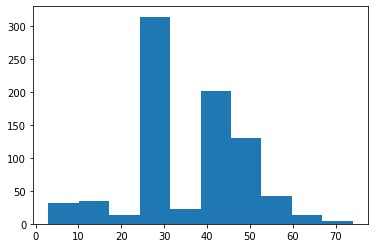

In [258]:
# Comparing Loyalty of Decile 1 customers vs other Deciles
a=df.loc[df['Decile']==1]['Years_since_customer']
plt.hist(a)

(array([7.560e+02, 6.810e+02, 3.223e+03, 1.859e+03, 5.320e+02, 1.850e+02,
        3.500e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2. , 11.2, 20.4, 29.6, 38.8, 48. , 57.2, 66.4, 75.6, 84.8, 94. ]),
 <a list of 10 Patch objects>)

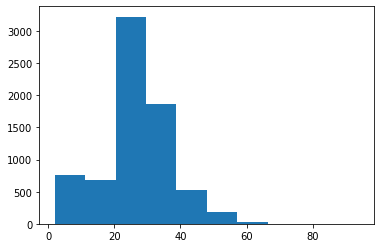

In [259]:
#Loyalty of customers with store who were not in First Decile
b=df.loc[df['Decile']!=1]['Years_since_customer']
plt.hist(b)

# Product Wise Purchase Comparison per Decile 

In [260]:
df1 = df[['Decile','Office Supplies_Y','Insurance_Y','Computer_Y','Monitor_Y','Toner_Y','Printer_Y', 'Desk_Y', 'Executive Chair_Y','Standard Chair_Y']]

In [261]:
g1 = df1.groupby('Decile', as_index=False).sum()

In [262]:
print(g1)

   Decile  Office Supplies_Y  Insurance_Y  Computer_Y  Monitor_Y  Toner_Y  \
0       1                336          172          85        112      121   
1       2                700           77           4          6       44   
2       3                630           95           6          5       56   
3       4                574          108           2          4       51   
4       5                635           74           0          5       46   
5       6                455           96           2          1       37   
6       7                454           77           0          0       37   
7       8                652           82           0          0       35   
8       9                737           71           1          0       39   
9      10                739           98           2          0       70   

   Printer_Y  Desk_Y  Executive Chair_Y  Standard Chair_Y  
0        102      84                150                84  
1         12      37            

In [263]:
bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [264]:
#convert datetimes to strings
g1['Decile'] = g1['Decile'].apply(str)
#convert dataframe to dict
data = g1.to_dict(orient='list')
dates = g1['Decile'].tolist()

In [204]:
from bokeh.core.properties import value
from bokeh.transform import dodge
source = ColumnDataSource(data=data)
p = figure(x_range=dates, y_range=(0, g1[['Office Supplies_Y']].values.max() + 250), plot_height=250, title="Decile Wise Office Supplies Purchase",
           toolbar_location=None, tools="")

p.vbar(x=dodge('Decile', 0, range=p.x_range), top='Office Supplies_Y', width=0.4, source=source, color="#c9d9d3")

p.add_tools(HoverTool(tooltips=[("Office Supplies", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [205]:
source = ColumnDataSource(data=data)
p = figure(x_range=dates, y_range=(0, g1[['Insurance_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Insurance Purchase", toolbar_location=None, tools="")

p.vbar(x=dodge('Decile', 0, range=p.x_range), top='Insurance_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[('Insurance', "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [206]:
source = ColumnDataSource(data=data)

p = figure(x_range=dates, y_range=(0, g1[['Computer_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Computer Purchase", toolbar_location=None, tools="")

p.vbar(x=dodge('Decile', 0, range=p.x_range), top='Computer_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[('Computer', "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [207]:
source = ColumnDataSource(data=data)

p = figure(x_range=dates, y_range=(0, g1[['Monitor_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Monitor Purchase", toolbar_location=None, tools="")

p.vbar(x=dodge('Decile', 0, range=p.x_range), top='Monitor_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[('Monitor', "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [208]:
source = ColumnDataSource(data=data)

p = figure(x_range=dates, y_range=(0, g1[['Toner_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Toner Purchase",toolbar_location=None, tools="")

p.vbar(x=dodge('Decile', 0, range=p.x_range), top='Toner_Y', width=0.4, source=source,color="#718dbf")

p.add_tools(HoverTool(tooltips=[('Toner', "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [209]:
source = ColumnDataSource(data=data)

p = figure(x_range=dates, y_range=(0, g1[['Printer_Y']].values.max() + 10), 
           plot_height=250, title="Decile Wise Printer Purchase", toolbar_location=None, tools="")

p.vbar(x=dodge('Decile',  0,  range=p.x_range), top='Printer_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[("Printer", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [210]:
source = ColumnDataSource(data=data)
p = figure(x_range=dates, y_range=(0, g1[['Desk_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Desk Purchase", toolbar_location=None, tools="")

p.vbar(x=dodge('Decile',  0,  range=p.x_range), top='Desk_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[("Desk", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [211]:
source = ColumnDataSource(data=data)
p = figure(x_range=dates, y_range=(0, g1[['Executive Chair_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Executive Chair Purchase", toolbar_location=None, tools="")


p.vbar(x=dodge('Decile',  0,  range=p.x_range), top='Executive Chair_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[("Executive Chair", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [212]:
source = ColumnDataSource(data=data)
p = figure(x_range=dates, y_range=(0, g1[['Standard Chair_Y']].values.max() + 5), 
           plot_height=250, title="Decile Wise Standard Chair Purchase", toolbar_location=None, tools="")


p.vbar(x=dodge('Decile',  0,  range=p.x_range), top='Standard Chair_Y', width=0.4, source=source, color="#718dbf")

p.add_tools(HoverTool(tooltips=[("Standard Chair", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [213]:
df2 = df[['Decile','Number of Employees_Big','Number of Employees_Huge','Number of Employees_Large', 'Number of Employees_medium','Number of Employees_small','Number of Employees_unknown']]

          

In [214]:
g2 = df2.groupby('Decile', as_index=False).sum()

In [215]:
print(g2)

   Decile  Number of Employees_Big  Number of Employees_Huge  \
0       1                       59                        23   
1       2                       22                         5   
2       3                       22                        21   
3       4                       74                        16   
4       5                       19                         9   
5       6                       35                        13   
6       7                       56                         4   
7       8                        6                         3   
8       9                       10                         5   
9      10                       25                         7   

   Number of Employees_Large  Number of Employees_medium  \
0                         90                          81   
1                         76                         166   
2                         34                          33   
3                        156                         19

In [216]:
#convert datetimes to strings
g2['Decile'] = g2['Decile'].apply(str)
#convert dataframe to dict
data2 = g2.to_dict(orient='list')
dates2 = g2['Decile'].tolist()

In [233]:
source = ColumnDataSource(data=data2)
p = figure(x_range=dates2, y_range=(0, g2[['Number of Employees_Big','Number of Employees_Huge','Number of Employees_Large', 'Number of Employees_medium','Number of Employees_small','Number of Employees_unknown']].values.max() + 250), 
           plot_height=250, title="Customer Company Size by Number of Employees", toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('Decile',  -.45,  range=p.x_range), top='Number of Employees_Big', width=0.15, source=source, color="DarkKhaki", legend=value("Big"))
p.vbar(x=dodge('Decile',  -0.30,  range=p.x_range), top='Number of Employees_Huge', width=0.15, source=source, color="SteelBlue", legend=value("Huge"))
p.vbar(x=dodge('Decile',  -0.15,  range=p.x_range), top='Number of Employees_Large', width=0.15, source=source, color="DarkGray", legend=value("Large"))
p.vbar(x=dodge('Decile',  0,  range=p.x_range), top='Number of Employees_medium', width=0.15, source=source, color="#718dbf", legend=value("medium"))
p.vbar(x=dodge('Decile',  0.15,  range=p.x_range), top='Number of Employees_small', width=0.15, source=source, color="Navy", legend=value("small"))
p.vbar(x=dodge('Decile',  0.30,  range=p.x_range), top='Number of Employees_unknown', width=0.15, source=source, color="DarkTurquoise", legend=value("unknown"))



GlyphRenderer(id='19566', ...)

In [237]:
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [219]:
df3 = df[['Decile','Last Transaction Channel_AUTO RENEW','Last Transaction Channel_BILLING','Last Transaction Channel_BRANCH (PHONE)','Last Transaction Channel_BRANCH (POS)', 'Last Transaction Channel_MAIL','Last Transaction Channel_IT','Last Transaction Channel_PHONE','Last Transaction Channel_UNKNOWN','Last Transaction Channel_WEB']]

In [220]:
g3 = df3.groupby('Decile', as_index=False).sum()

In [221]:
#convert datetimes to strings
g3['Decile'] = g3['Decile'].apply(str)
#convert dataframe to dict
data3 = g3.to_dict(orient='list')
dates3 = g3['Decile'].tolist()

In [230]:
source = ColumnDataSource(data=data3)
p = figure(x_range=dates3, y_range=(0, g3[['Last Transaction Channel_AUTO RENEW','Last Transaction Channel_BILLING','Last Transaction Channel_BRANCH (PHONE)','Last Transaction Channel_BRANCH (POS)', 'Last Transaction Channel_MAIL','Last Transaction Channel_IT','Last Transaction Channel_PHONE','Last Transaction Channel_UNKNOWN','Last Transaction Channel_WEB']].values.max() + 150), 
           plot_height=250, title="Transaction Channel Per Decile", toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('Decile',  -.40,  range=p.x_range), top='Last Transaction Channel_AUTO RENEW', width=0.1, source=source, color="DarkKhaki", legend=value("Auto Renew"))
p.vbar(x=dodge('Decile',  -0.30,  range=p.x_range), top='Last Transaction Channel_BILLING', width=0.1, source=source, color="SteelBlue", legend=value("Billing"))
p.vbar(x=dodge('Decile',  -0.20,  range=p.x_range), top='Last Transaction Channel_BRANCH (PHONE)', width=0.1, source=source, color="DarkGray", legend=value("Branch Phone"))
p.vbar(x=dodge('Decile',  -0.10,  range=p.x_range), top='Last Transaction Channel_BRANCH (POS)', width=0.1, source=source, color="#718dbf", legend=value("Branch"))
p.vbar(x=dodge('Decile',  0,  range=p.x_range), top='Last Transaction Channel_MAIL', width=0.1, source=source, color="Navy", legend=value("Mail"))
p.vbar(x=dodge('Decile',  0.10,  range=p.x_range), top='Last Transaction Channel_IT', width=0.1, source=source, color="DarkTurquoise", legend=value("IT"))
p.vbar(x=dodge('Decile',  0.20,  range=p.x_range), top='Last Transaction Channel_PHONE', width=0.1, source=source, color="PaleVioletRed", legend=value("Phone"))
p.vbar(x=dodge('Decile',  0.30,  range=p.x_range), top='Last Transaction Channel_UNKNOWN', width=0.1, source=source, color="OliveDrab", legend=value("Unknown"))
p.vbar(x=dodge('Decile',  0.40,  range=p.x_range), top='Last Transaction Channel_WEB', width=0.1, source=source, color="Purple", legend=value("WEB"))



GlyphRenderer(id='19109', ...)

In [235]:
p.x_range.range_padding = 0
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)

In [224]:
df4 = df[['Decile','Repurchase Method_AUTO RENEW','Repurchase Method_NOTICE', 'Repurchase Method_PAYMENT PLAN']]

In [225]:
g4 = df4.groupby('Decile', as_index=False).sum()

In [226]:
#convert datetimes to strings
g4['Decile'] = g4['Decile'].apply(str)
#convert dataframe to dict
data4 = g4.to_dict(orient='list')
dates4 = g4['Decile'].tolist()

In [236]:
source = ColumnDataSource(data=data4)
p = figure(x_range=dates4, y_range=(0, g4[['Repurchase Method_AUTO RENEW','Repurchase Method_NOTICE', 'Repurchase Method_PAYMENT PLAN']].values.max() + 150), 
           plot_height=250, title="Repurchase Method Per Decile",
           toolbar_location=None, tools="", plot_width= 800)

p.vbar(x=dodge('Decile',  -.25,  range=p.x_range), top='Repurchase Method_AUTO RENEW', width=0.25, source=source, color="DarkKhaki", legend=value("Auto Renew"))
p.vbar(x=dodge('Decile', 0,  range=p.x_range), top='Repurchase Method_NOTICE', width=0.25, source=source, color="SteelBlue", legend=value("Notice"))
p.vbar(x=dodge('Decile',  0.25,  range=p.x_range), top='Repurchase Method_PAYMENT PLAN', width=0.25, source=source, color="DarkGray", legend=value("Payment Plan"))

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p)